**T Test on SKU is done - where discount was given on Wednesday were found out and their corresponding sales quantities in W1 were  grouped and week 1 sales quantities of SKUs for which no discount was given were grouped together.**

**- To see if there is an impact of this special pricing on the quantity sold in a particular week.**

**T-test was done with 95% confidence interval with a sample size of 100.**
    - H0 : There is no significant difference.
    - HA : There is a significant difference.
    

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [5]:
%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()

In [7]:
sales = pd.read_csv("sales1.csv")
price = pd.read_csv("price1.csv")

In [8]:
sales.head()

,Unnamed: 0,New SKU,Brand,Upstream Contact,Type,Location,W1,W2,W3,W4,...,W54,W55,W56,W57,W58,W59,W60,W61,W62,SUM
0,2,GN1576961-Z-WH19706,Mudramark,WOODENMOOD,HB-SW,Mumbai,0,2,0,0,...,0,0,0,0,0,0,0,0,0,33
1,3,GN1576961-Z-WH32492,Mudramark,Woodenmood,HB-SW,Mumbai,0,0,0,0,...,0,0,0,0,0,1,1,0,2,4
2,4,GN7828171-Z-WH19566,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
3,5,GN7828171-Z-WH32476,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2
4,6,GN9415061-Z-WH4248,Amberville,Vishwakarma Antique,HB-SW,Mumbai,0,0,0,0,...,1,0,0,0,0,0,1,0,0,9


In [9]:
price.head()

,New SKU,Brand,Upstream Contact,Type,Location,W1,W2,W3,W4,W5,...,W54,W55,W56,W57,W58,W59,W60,W61,W62,W63
0,GN1576961-Z-WH19706,Mudramark,WOODENMOOD,HB-SW,Mumbai,64374,64374,64374,64374,64999,...,62799,55142,56099,56699,56699,56699,47199,52599,66899,71699
1,GN1576961-Z-WH32492,Mudramark,Woodenmood,HB-SW,Mumbai,0,0,0,0,0,...,62799,55142,56099,56699,56699,56699,47199,52599,66899,71699
2,GN7828171-Z-WH19566,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,46249,43124,43124,43124,43749,...,62666,62713,64499,64499,63299,63299,50999,51599,56599,60699
3,GN7828171-Z-WH32476,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,0,0,0,0,...,62666,62713,64499,64499,63299,63299,50999,51599,56599,60699
4,GN9415061-Z-WH4248,Amberville,Vishwakarma Antique,HB-SW,Mumbai,0,33749,33749,33749,33749,...,40799,40856,42299,42299,42299,42299,33499,26799,34399,33099


In [10]:
price[price['W1']==0]

,New SKU,Brand,Upstream Contact,Type,Location,W1,W2,W3,W4,W5,...,W54,W55,W56,W57,W58,W59,W60,W61,W62,W63
1,GN1576961-Z-WH32492,Mudramark,Woodenmood,HB-SW,Mumbai,0,0,0,0,0,...,62799,55142,56099,56699,56699,56699,47199,52599,66899,71699
3,GN7828171-Z-WH32476,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,0,0,0,0,...,62666,62713,64499,64499,63299,63299,50999,51599,56599,60699
4,GN9415061-Z-WH4248,Amberville,Vishwakarma Antique,HB-SW,Mumbai,0,33749,33749,33749,33749,...,40799,40856,42299,42299,42299,42299,33499,26799,34399,33099
6,GN2218871-Z-WH32475,Amberville,Gangadhar Ratanlal Furniture Showroom,HB-SW,Mumbai,0,0,0,0,0,...,76666,76713,73799,73799,73799,66499,53699,54299,63099,67699
8,GN2605761-Z-WH32475,Amberville,Gangadhar Ratanlal Furniture Showroom,HB-SW,Mumbai,0,0,0,0,0,...,45866,45999,47699,47699,44199,44199,35399,35799,39899,42799
12,GN4227661-Z-WH10719,Woodsworth,Myyra,HB-SW,Mumbai,0,36874,36874,36874,37499,...,53999,53999,55399,55399,45499,45499,38099,43499,56599,60699
15,GN6127661-Z-WH10719,Woodsworth,Myyra,HB-SW,Mumbai,0,36874,36874,36874,36874,...,53999,53999,55399,55399,45499,45499,38099,43499,56599,60699
17,GN4127661-Z-WH10719,Woodsworth,Myyra,HB-SW,Mumbai,0,29999,29999,29999,29999,...,41732,41856,42899,42899,42099,42099,34299,36399,44799,47999
18,GN2274471-Z-WH2194,Woodsworth,Appu Art & Handicrafts,HB-SW,Mumbai,0,0,0,0,0,...,39199,39285,40399,40399,40399,40399,32599,32999,36199,38799
19,GN9824471-Z-WH2194,Woodsworth,Appu Art & Handicrafts,HB-SW,Mumbai,0,0,0,0,0,...,39199,39285,40399,40399,40399,40399,32599,32999,36199,38799


In [11]:
# Findind the SKUs for which there was no special price on wednesday of Week 1
regular_price_SKU = price['New SKU'][price['W1']==0]
regular_price_SKU

1      GN1576961-Z-WH32492
3      GN7828171-Z-WH32476
4       GN9415061-Z-WH4248
6      GN2218871-Z-WH32475
8      GN2605761-Z-WH32475
12     GN4227661-Z-WH10719
15     GN6127661-Z-WH10719
17     GN4127661-Z-WH10719
18      GN2274471-Z-WH2194
19      GN9824471-Z-WH2194
20      GN2624471-Z-WH2194
21      GN8764471-Z-WH2194
25     GN6517761-Z-WH32531
28     GN7664471-Z-WH15338
29     GN7664471-Z-WH32531
30     GN6424471-Z-WH15338
31     GN8964471-Z-WH15338
35     GN0587661-Z-WH32489
38     GN0324471-Z-WH10868
39      GN7415061-Z-WH4248
41      GN8415061-Z-WH4248
43     GN8864471-Z-WH10868
44     GN6378471-Z-WH31628
45     GN3664471-Z-WH22695
46      GN0764471-Z-WH2203
47      GN5964471-Z-WH8834
51     GN6512061-Z-WH21497
53      GN7864471-Z-WH9047
54      GN4274471-Z-WH4248
56     GN7914471-Z-WH13834
              ...         
673    GN6224471-Z-WH32511
674    GN3795771-Z-WH22004
675    GN5795771-Z-WH32481
676    GN5842871-Z-WH11393
677    GN5842871-Z-WH32511
678    GN1304871-Z-WH32524
6

In [12]:
# Grouping the Week 1 sales quantity of these regular price SKUs
W1_regularsales = sales['W1'][sales['New SKU'].isin(regular_price_SKU)]
# Converting it into a numpy array
W1_regularsales = W1_regularsales.to_numpy()
W1_regularsales

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
# Findind the SKUs for which there was a special price given on wednesday of Week 1
special_price_SKU = price['New SKU'][-price['New SKU'].isin(regular_price_SKU)]

In [14]:
# Grouping the Week 1 sales quantity of these special price SKUs
W1_specialsales = sales['W1'][sales['New SKU'].isin(special_price_SKU)]

In [15]:
# Converting it into a numpy array
W1_specialsales = W1_specialsales.to_numpy()
W1_specialsales

array([0, 0, 0, 0, 1, 0, 0, 2, 2, 5, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 6, 0, 8, 1, 3, 0, 0, 0, 0, 0, 0, 4, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 3, 0, 2, 3, 1, 3, 0, 4, 4, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 7, 1, 0, 0, 0, 4, 0, 0, 0, 0, 2, 8, 2, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [16]:
# Define a function for t test
# H0 : There is no significant difference between the two samples
# HA : There is a significant difference between the two samples
def compare_groups(x1, x2, alpha, sample_size):
    stat, p = ttest_ind(x1, x2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('No Difference- Fail to reject H0')
    else:
        print('Significant Difference- Reject H0')

In [17]:
# Specifying the parameters and running the t test funtion
# Here as the two arrays have 711 rows, I took a sample size to be 100
sample_size = 100
regular_sample = np.random.choice(W1_regularsales, sample_size)
special_sample = np.random.choice(W1_specialsales, sample_size)
compare_groups(regular_sample, special_sample, 0.05, sample_size)

# Since the p-value is less than the alpha significance, we reject the null hypothesis.
# Thus there is a significant impcat of special price on sales quantity

Statistics=-4.136, p=0.000
Significant Difference- Reject H0


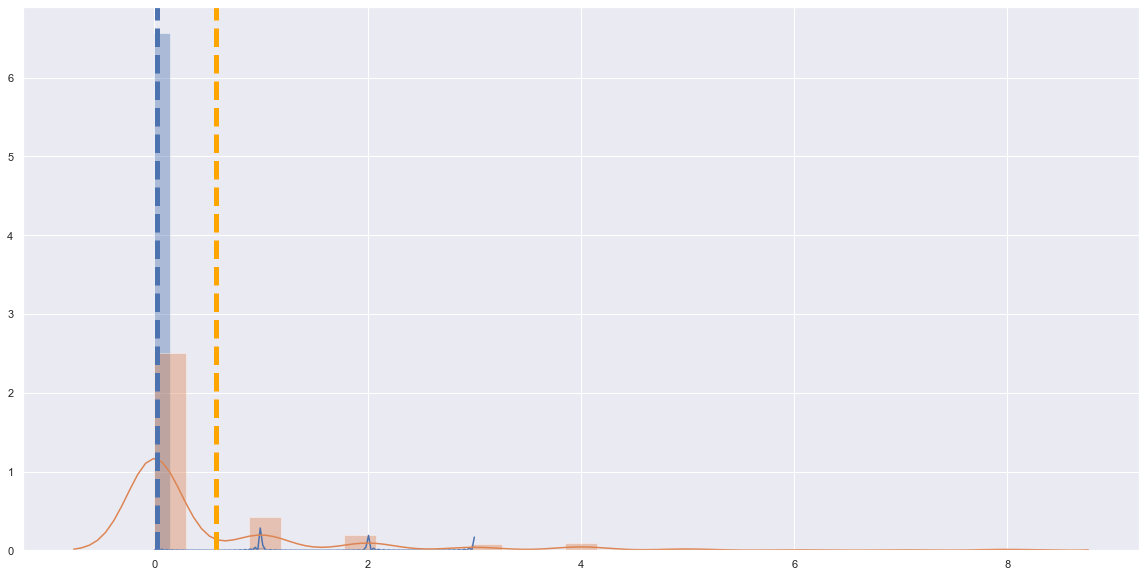

In [19]:
# Pltting the means manually
plt.figure()
ax1 = sns.distplot(W1_regularsales)
ax2 = sns.distplot(W1_specialsales)
plt.axvline(np.mean(W1_regularsales), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(W1_specialsales), color='orange', linestyle='dashed', linewidth=5)